In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import json

#### Load in json file (list of dictionaries) and convert to Pandas Dataframe
- df.head() to take a quick look at columns
- dtypes to see the types of values in all the columns

In [2]:
with open('climbing_shoes_data.json') as f:
  data = json.load(f)
original_df = pd.DataFrame(data)
original_df.head()

,Best Use,Climbing Shoe Type,Last,Upper,Lining,Outsole,Footwear Closure,Can Be Resoled,Gender,Weight (Pair),Price,Name,Brand,Vegan,Sustainability,Material(s),Weight
0,Rock Climbing,Neutral,Slip-lasted,Synthetic knit,Hemp,Rubber,Strap,Yes,Mens,15.6 ounces,94.95,Black Diamond Momentum Climbing Shoes Ash Mens,Black Diamond,NaN,NaN,NaN,NaN
1,Rock Climbing,Neutral,Slip-lasted,Leathersynthetic leather,None,Rubber,Lace-up,Yes,Womens,1 lb. 2.6 oz. ounces,85.00,La Sportiva Tarantulace Climbing Shoes Womens,La Sportiva,NaN,NaN,NaN,NaN
2,Rock Climbing,Neutral,Slip-lasted,Leathersynthetic leather,No,FriXion RS rubber,Lace-up,Yes,Unisex,1 lb. 2.3 oz.,85.00,La Sportiva Tarantulace Climbing Shoes,La Sportiva,NaN,NaN,NaN,NaN
3,Rock Climbing,Neutral,Slip-lasted,Leathermicrofiber,Unlined,5 mm Vibram XS Edge rubber,Lace-up,Yes,Mens,1 pound,109.00,La Sportiva Finale Climbing Shoes Mens,La Sportiva,NaN,NaN,NaN,NaN
4,Climbing,Neutral,Slip-lasted,Leather,Leather,Rubber,Strap,Yes,Mens,1 lb. 1.6 oz.,89.93,Five Ten Asym Vcs Climbing Shoes Mens,Five Ten,NaN,NaN,NaN,NaN


In [3]:
original_df.dtypes

Best Use               object
Climbing Shoe Type     object
Last                   object
Upper                  object
Lining                 object
Outsole                object
Footwear Closure       object
Can Be Resoled         object
Gender                 object
Weight (Pair)          object
Price                 float64
Name                   object
Brand                  object
Vegan                  object
Sustainability         object
Material(s)            object
Weight                 object
dtype: object

In [4]:
df = original_df.drop(['Vegan', 'Sustainability', 'Material(s)', 'Weight'], axis = 1)
df.head()

,Best Use,Climbing Shoe Type,Last,Upper,Lining,Outsole,Footwear Closure,Can Be Resoled,Gender,Weight (Pair),Price,Name,Brand
0,Rock Climbing,Neutral,Slip-lasted,Synthetic knit,Hemp,Rubber,Strap,Yes,Mens,15.6 ounces,94.95,Black Diamond Momentum Climbing Shoes Ash Mens,Black Diamond
1,Rock Climbing,Neutral,Slip-lasted,Leathersynthetic leather,None,Rubber,Lace-up,Yes,Womens,1 lb. 2.6 oz. ounces,85.00,La Sportiva Tarantulace Climbing Shoes Womens,La Sportiva
2,Rock Climbing,Neutral,Slip-lasted,Leathersynthetic leather,No,FriXion RS rubber,Lace-up,Yes,Unisex,1 lb. 2.3 oz.,85.00,La Sportiva Tarantulace Climbing Shoes,La Sportiva
3,Rock Climbing,Neutral,Slip-lasted,Leathermicrofiber,Unlined,5 mm Vibram XS Edge rubber,Lace-up,Yes,Mens,1 pound,109.00,La Sportiva Finale Climbing Shoes Mens,La Sportiva
4,Climbing,Neutral,Slip-lasted,Leather,Leather,Rubber,Strap,Yes,Mens,1 lb. 1.6 oz.,89.93,Five Ten Asym Vcs Climbing Shoes Mens,Five Ten


### Got rid of unnecessary columns
1. Drop the follwoing columns because majority of items do not contain values in them:
    * Vegan
    * Sustainability
    * Material(s)
    * Weight
2. Ensure all unnecessary columns have been removed

### Explore the dataset

In [5]:
df.describe()

,Price
count,124.000000
mean,120.741048
std,46.553023
min,19.950000
25%,89.000000
50%,109.965000
75%,160.000000
max,199.000000


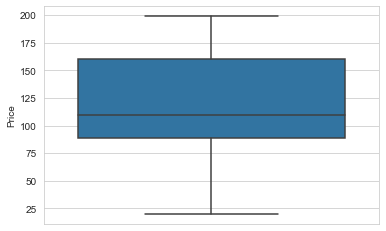

In [6]:
sns.set_style('whitegrid')
sns.boxplot(y=df['Price'])

#### The mean Price is 120 and we can see there are no outliers using the interquartile range method. 

In [7]:
df.loc[df['Price'] == 19.95]

,Best Use,Climbing Shoe Type,Last,Upper,Lining,Outsole,Footwear Closure,Can Be Resoled,Gender,Weight (Pair),Price,Name,Brand
88,Rock Climbing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.95,Metolius Hang Dogs Shoe Keepers,Metolius


In [8]:
df.drop(df.loc[df['Price'] == 19.95].index,inplace=True) #getting rid of the min becuase it was not relevant
df.describe() 

,Price
count,123.000000
mean,121.560488
std,45.836685
min,39.930000
25%,89.000000
50%,110.930000
75%,160.000000
max,199.000000


#### Dropped the row where price was equal to 19.95 becasue all the columns except for price were empty, and the low price seemed to not fit with the rest of dataset. The new minimum is 39.95 which makes more sense.

In [9]:
df.groupby('Brand').mean()

,Price
Brand,
Black Diamond,89.939231
Butora,136.266667
Five Ten,83.475000
La Sportiva,140.724000
Scarpa,143.351600
So iLL,122.215000
TENAYA,144.945000
evolv,122.978462


#### Looking at the mean price by brand and we can see 2 of them are siniifcantly lower than the rest.

In [10]:
df['Weight (Pair)']

0               15.6 ounces
1      1 lb. 2.6 oz. ounces
2             1 lb. 2.3 oz.
3                   1 pound
4             1 lb. 1.6 oz.
               ...         
119                14.2 oz.
120                15.2 oz.
121                12.2 oz.
122                12.6 oz.
123            1 lb 2.9 oz.
Name: Weight (Pair), Length: 123, dtype: object

#### The weight column has very messy data and needs to be converted to float values representing ounces in order to be used for classification.

In [11]:
def is_float(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
pound_words = {"pound", "pounds", "lb", "lb.", "lbs"}
ounce_words = {"ounce", "ounces", "oz", "oz.", "ozs"}
grams = {'grams'}
convert_p_o = 16
convert_g_o = 0.035274
def lb_to_oz(weight):
    if is_float(weight):
        return weight
    if weight in {'Unavailable','Nan'}:
        return None
    x = weight.lower().split()
    if len(x) not in (1,2,4):
        v2 = float(x[0])
        v3 = float(x[2])
        lbs = v2
        ozs = v3  
    v1 = float(x[0])
    if len(x) == 1:
        if is_float(x[0]):
            ozs = float(x[0])
            return ozs
    if len(x) == 2:
        if x[1] in pound_words:
            lbs = v1
            ozs = 0
        elif x[1] in ounce_words:
            lbs = 0
            ozs = v1
        elif x[1] in grams:
            gs = float(x[0])
            ozs = 0
            return gs * convert_g_o + ozs
        elif is_float(x[1]):
            lbs = v1
            ozs = float(x[1])
    else:
        if x[1] in pound_words and is_float(x[2]) and x[3] in ounce_words:
            lbs = v1
            ozs = float(x[2])
    return lbs * convert_p_o + ozs 

In [12]:
df = df.rename(columns={'Weight (Pair)':'Weight (ozs.)'})

#### The above functions are required to clean and format the data in the Weight column in order to convert the column to float values that represent ounces, and then renaming the column to show that it represents weight in ounces.

In [13]:
for index,r in enumerate(df['Weight (ozs.)']):
    try:
        r1 = lb_to_oz(r)
        df.at[index, 'Weight (ozs.)'] = r1
    except Exception as e:
        print(index)
        print(e)

87
could not convert string to float: 'ounces'


In [14]:
df.iloc[[87]]

,Best Use,Climbing Shoe Type,Last,Upper,Lining,Outsole,Footwear Closure,Can Be Resoled,Gender,Weight (ozs.),Price,Name,Brand
87,Climbing,Moderate,Slip-lasted,Leather,Leather,Stealth C4 rubber,Lace-up,Yes,Mens,15.8 oz ounces,39.93,Five Ten Rogue Lace Climbing Shoes Mens,Five Ten


In [15]:
df.replace(to_replace =["15.8 ounces", "15.8 oz ounces"],  
                            value = 15.8, inplace = True)
df.replace(to_replace = '1 lb 2.9 oz.', value = 18.9, inplace = True)
df['Weight (ozs.)'] = df['Weight (ozs.)'].astype('float64')
df.drop(index=88, inplace = True)

#### Row 87 had an issue because of the way the weight was entered, so a manual change to that was needed. Then converted the weight column to float values, and dropped row 88 due to missing values.

In [16]:
df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)
df.shape

(123, 13)

#### reset the index, and dropped the extra index column and checked the shape to make sure we had everything.

In [17]:
df.dtypes

Best Use               object
Climbing Shoe Type     object
Last                   object
Upper                  object
Lining                 object
Outsole                object
Footwear Closure       object
Can Be Resoled         object
Gender                 object
Weight (ozs.)         float64
Price                 float64
Name                   object
Brand                  object
dtype: object

#### Ensuring the weight column did indeed convert properly.

In [18]:
df.groupby('Brand').mean()

,Weight (ozs.),Price
Brand,,
Black Diamond,14.790000,89.939231
Butora,16.400000,136.266667
Five Ten,15.675000,83.475000
La Sportiva,16.555478,140.724000
Scarpa,15.279167,143.351600
So iLL,15.485714,122.215000
TENAYA,21.300000,144.945000
evolv,17.553846,122.978462


#### Looking at mean weights by brand no as well, and we can see they are all in the same range, with the exception of Tenaya being relativley higher than the rest.

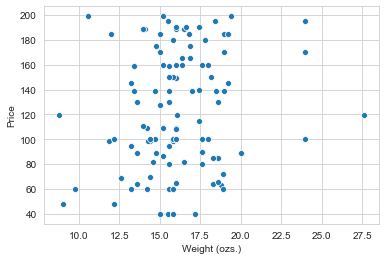

In [19]:
sns.scatterplot(data=df,x='Weight (ozs.)',y='Price')

#### Checking to see if there is a linear correlation between these two factors, however there is not.

In [20]:
for i in df.columns:
    print(i)
    print(df[i].unique())

Best Use
['Rock Climbing' 'Climbing']
Climbing Shoe Type
['Neutral' 'Aggressive' 'Moderate']
Last
['Slip-lasted' 'Board-lasted' 'Polyester/leather']
Upper
['Synthetic knit' 'Leathersynthetic leather' 'Leathermicrofiber' 'Leather'
 'Synthetic' 'Microfiber' 'Split-grain leather' 'Synthetic leather'
 'Leathermicrofiberrubber toe cap' 'Knit' 'Synthetic microsuede'
 'Suede leather' 'Leather with knit tongue' 'Microfiberleatherrubber'
 'Suedeleather' 'Split-grain rubber' 'Synthetic suede'
 'Synthratek VX synthetic' 'Microfiberleather'
 'Ceramic microsuedeAlcantara' 'Suede leathermicrofiber'
 'Synthetic leatherpolyurethane' 'Knit fabric' '1.8mm micro-suede'
 'Synthratek VX' 'Clarino synthetic leather' 'Microfiber textile'
 'Synthetic Clarino' 'Polyester' 'Idro-Perwanger biodegradable leather']
Lining
['Hemp' 'None' 'No' 'Unlined' 'Leather' 'Synthetic micro fiber' nan
 'AirTex Silver' 'Cotton canvas' 'Yesunlined underfoot'
 'HF toe box and arch area only' 'Pacific forefoot and back'
 'Stretch 

In [22]:
df1 = df.copy()

In [23]:
df1.loc[(df1['Lining']== 'None')|(df1['Lining']=='No'),'Lining'] = 'Unlined'
df1['Lining'] = df1['Lining'].fillna(value='Unlined')

In [26]:
len(df1['Outsole'].unique())+len(df1['Upper'].unique())

82

#### Cleaning the data in the Lining column and getting rid of NaN values, to decrease the dimensionality after one-hot encoding the column.

In [27]:
df1 = pd.get_dummies(data = df, columns=['Climbing Shoe Type', 'Gender', 'Last','Footwear Closure',
                                         'Can Be Resoled', 'Lining','Outsole','Upper'])

In [29]:
df1.drop(columns=['Best Use','Name'], inplace=True)

In [30]:
df1

,Weight (ozs.),Price,Brand,Climbing Shoe Type_Aggressive,Climbing Shoe Type_Moderate,Climbing Shoe Type_Neutral,Gender_Kids,Gender_Mens,Gender_Unisex,Gender_Womens,...,Upper_Suedeleather,Upper_Synthetic,Upper_Synthetic Clarino,Upper_Synthetic knit,Upper_Synthetic leather,Upper_Synthetic leatherpolyurethane,Upper_Synthetic microsuede,Upper_Synthetic suede,Upper_Synthratek VX,Upper_Synthratek VX synthetic
0,15.6,94.95,Black Diamond,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,18.6,85.00,La Sportiva,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,18.3,85.00,La Sportiva,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,109.00,La Sportiva,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.6,89.93,Five Ten,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,15.2,86.73,Five Ten,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
119,12.2,47.73,Five Ten,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
120,12.6,68.73,Five Ten,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
121,18.9,71.73,Five Ten,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [49]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [50]:
X = df1.drop(columns = 'Brand')
y = df1['Brand']

In [55]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(98, 124) (98,)
(25, 124) (25,)


In [57]:
model = xgb.XGBClassifier(objective='multi:softmax',missing=None)
model.fit(X_train,y_train,early_stopping_rounds=15,eval_metric='mlogloss',eval_set=[(X_test,y_test)])

[0]	validation_0-mlogloss:1.83129
[1]	validation_0-mlogloss:1.60220
[2]	validation_0-mlogloss:1.42253
[3]	validation_0-mlogloss:1.31516
[4]	validation_0-mlogloss:1.23221
[5]	validation_0-mlogloss:1.16868
[6]	validation_0-mlogloss:1.14026
[7]	validation_0-mlogloss:1.11746
[8]	validation_0-mlogloss:1.12015
[9]	validation_0-mlogloss:1.10387
[10]	validation_0-mlogloss:1.09214
[11]	validation_0-mlogloss:1.07302
[12]	validation_0-mlogloss:1.06207
[13]	validation_0-mlogloss:1.05508
[14]	validation_0-mlogloss:1.07889
[15]	validation_0-mlogloss:1.07926
[16]	validation_0-mlogloss:1.09199
[17]	validation_0-mlogloss:1.10646
[18]	validation_0-mlogloss:1.11727
[19]	validation_0-mlogloss:1.11613
[20]	validation_0-mlogloss:1.12796
[21]	validation_0-mlogloss:1.12914
[22]	validation_0-mlogloss:1.13241
[23]	validation_0-mlogloss:1.13811
[24]	validation_0-mlogloss:1.14202
[25]	validation_0-mlogloss:1.14951
[26]	validation_0-mlogloss:1.15040
[27]	validation_0-mlogloss:1.14994
[28]	validation_0-mlogloss:1.1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
pred = model.predict(X_test)

In [ ]:
param_grid = {'gamma':, 'max_depth':, 'learning_rate'}